<a href="https://colab.research.google.com/github/AyaElsawyElghaysh/DeepLearing/blob/main/Movies_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification of movies reviews using deeplearning 
#on IMBD dataset

In [1]:
import tensorflow as tf 
from google.colab.patches import cv2_imshow
import cv2 as cv 
import numpy as np 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,Dropout,Input,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

(X_train,y_train),(X_test,y_test)=keras.datasets.imdb.load_data(num_words=10000) #vocab words we choose 10k most frequent

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

#Decode numbers into english sentances

In [5]:
word_index=keras.datasets.imdb.get_word_index() #get index of each word
#map indices to words
word_from_index=dict([(v,k) for k,v in word_index.items()])
#there are there indices reserved 0 for padding and 1 for start of sequence 3 for unkown
review_decoded=' '.join([word_from_index.get(i-3,'?') for i in X_train[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
word_from_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
review_decoded

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## perparing data

In [8]:
#we cannot deal with indices in NN  so we will use bag of words
def vectorization(reviews,dimension=10000):
  #create matrix of size len(reviews)*dimension 
  matrix_words=np.zeros((len(reviews),dimension))
  for i,r in enumerate(reviews):
     #print(i,r)
     matrix_words[i,r]=1
  return matrix_words
       

In [9]:
x_train=vectorization(X_train)
x_test=vectorization(X_test)

In [10]:
print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [11]:
#Now we fixed the size for all reviews to pass it in NN it is the advantage of Bag of words


# Modeling

In [12]:
model=Sequential()
model.add(Dense(16,activation="relu",input_shape=(10000,))) #beacause of sparse vector
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid")) #binary classification 
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])

In [13]:
x_val,x_test,y_val,y_test=train_test_split(x_train,y_train,train_size=.8,shuffle=True)

In [14]:
#training
history_1=model.fit(x_val,y_val,epochs=15,validation_data=(x_test,y_test),batch_size=512)

Epoch 1/15
40/40 [==============================] - 2s 34ms/step - loss: 0.4784 - accuracy: 0.8082 - val_loss: 0.3416 - val_accuracy: 0.8838
Epoch 2/15
40/40 [==============================] - 1s 24ms/step - loss: 0.2750 - accuracy: 0.9067 - val_loss: 0.2778 - val_accuracy: 0.8950
Epoch 3/15
40/40 [==============================] - 1s 25ms/step - loss: 0.2084 - accuracy: 0.9288 - val_loss: 0.3150 - val_accuracy: 0.8718
Epoch 4/15
40/40 [==============================] - 1s 25ms/step - loss: 0.1673 - accuracy: 0.9433 - val_loss: 0.2693 - val_accuracy: 0.8954
Epoch 5/15
40/40 [==============================] - 1s 24ms/step - loss: 0.1441 - accuracy: 0.9498 - val_loss: 0.3227 - val_accuracy: 0.8776
Epoch 6/15
40/40 [==============================] - 1s 24ms/step - loss: 0.1235 - accuracy: 0.9601 - val_loss: 0.2940 - val_accuracy: 0.8904
Epoch 7/15
40/40 [==============================] - 1s 24ms/step - loss: 0.1073 - accuracy: 0.9653 - val_loss: 0.3120 - val_accuracy: 0.8888
Epoch 8/15
40

#Plotting

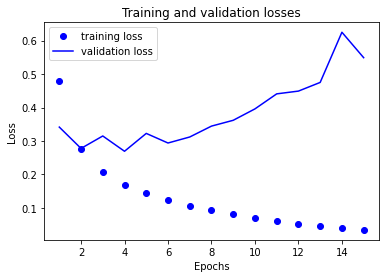

In [15]:
import matplotlib.pyplot as plt
acc=history_1.history["accuracy"]
val=history_1.history["val_accuracy"]
loss=history_1.history["loss"]
val_loss=history_1.history["val_loss"]
epochs=range(1,len(acc)+1)
#plot epochs with loss and val loss
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title("Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

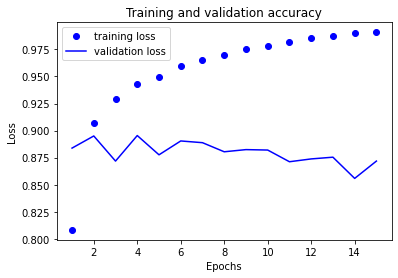

In [16]:
acc=history_1.history["accuracy"]
val=history_1.history["val_accuracy"]
loss=history_1.history["loss"]
val_loss=history_1.history["val_loss"]
epochs=range(1,len(acc)+1)
#plot epochs with loss and val loss
plt.plot(epochs,acc,'bo',label='training loss')
plt.plot(epochs,val,'b',label='validation loss')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

we find that at 2 epochs there are an overfitting 
we will overcome this problem later

In [17]:
model.predict(x_test)

array([[9.9901354e-01],
       [5.2559078e-03],
       [1.7881393e-04],
       ...,
       [9.9999893e-01],
       [9.9999762e-01],
       [9.9920309e-01]], dtype=float32)